<a href="https://colab.research.google.com/github/caropilardiaz/Mentoria-Imagenes_Drones/blob/master/3_Pr%C3%A1cticoIAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Diplomatura en Ciencias de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Mentoría Diplomatura en Ciencia de Datos 2020**
### **"Detección del desarrollo del cultivo con imágenes de Drones"**
### **Mentora** : Carolina Del Pilar Díaz

### **Introducción al Aprendizaje Automático**

 
En este laboratorio deben hacer experimentos de regresión y clasificación con el conjunto de datos obtenido en el práctico anterior.

Estudiarán el dataset y seleccionarán atributos relevantes a mano. 

El objetivo consiste en explorar la aplicación de diferentes métodos de aprendizaje supervisado aprendidos en el curso, a través de experimentos reproducibles, y evaluando a su vez la conveniencia de uno u otro, así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes. Nuestro objetivo no será construir el mejor modelo, sino ganar un poco más de intuición sobre nuestro conjunto de datos, y tomar algunas decisiones sobre las que profundizaremos en el próximo práctico.

Luego, entrenarán y evaluarán diferentes tipos de regresiones y clasificadores, buscando las configuraciones que mejores resultados den.

###Preprocesamiento
Antes de aplicar los modelos, haremos un filtrado de los datos. Se sugiere seguir los siguientes pasos, pero pueden experimentar ustedes también otras alternativas.ZADOCK y RDTO serán nuestras variables objetivos, sobre la cual buscaremos hacer predicciones las cuáles poseen diferentes distribuciones.

###Crear los siguientes features:
Ciclos; Asignar el valor 0 al ciclo corto y valor 1 al ciclo largo.
Conjunto de datos; Variable binaria construida a partir de asignar 1 correspondiente a la 1° fecha de siembra, o 0 en caso contrario.
Pueden decidir otras configuraciones que necesiten.

###Recordar;
Una vez que el dataset resultante no tenga valores nulos, es necesario transformar las variables categóricas en variables numéricas (es decir, realizar un encoding de los datos) además de convertir longitud,latitud y fechas a numericas.

Más info https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd


###Elección de los modelos
Con los pasos anteriores, nuestro dataset debería ser una tabla con valores numéricos y sin valores nulos. Ahora, deberán separar el conjunto de datos en conjunto de entrenamiento (train) y conjunto de prueba (test). Por ahora, no utilizaremos conjunto de validación. Se recomienda utilizar el método train_test_split de scikitlearn, con un 80% para train y 20% para test.

Una vez divididos los datos, construimos los modelos predictivos. Entrenen cada modelo utilizando el conjunto de entrenamiento y los parámetros por defecto y evaluen la predicción utilizando las cinco métricas descriptas más adelante según corresponda al modelo. 

Es importante recordar, que el dataset posee dos targets con distribuciones diferentes, ZADOK y RDTO.

###Elección de métricas
Un aspecto fundamental del aprendizaje automático es la elección de métricas para evaluar los modelos predictivos según correspondan. En este práctico vamos a explorar las siguientes cinco métricas:
ECM, 
Accuracy,
F1
AUC ROC,
AUC Precision-Recall.

Para cada uno de los modelos que utilicen, calculen las cinco métricas. Pueden encontrar información sobre las últimas dos https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

###División en Entrenamiento y Evaluación
Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import pandas as pd
import os
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta correcta')
    plt.xlabel('Etiqueta predicha')

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/luciozarazaga/Mentoria_Imagenes_Drones_Grupo_2/master/dataframelimpio2.csv')

In [ ]:
dataset=dataset.drop(['Longitude','Latitude', 'Fecha_x','Fecha_y','F_Espigazon'	,'F.Madurez'],axis=1)

In [ ]:
preproc = preprocessing.LabelEncoder()
dataset["ZADOCK"] = preproc.fit_transform(dataset.ZADOCK)

In [ ]:
dict(zip(preproc.classes_,preproc.transform(preproc.classes_)))

{3.9: 0,
 4.1: 1,
 4.3: 2,
 4.5: 3,
 4.7: 4,
 5.1: 5,
 5.3: 6,
 5.4: 7,
 5.5: 8,
 5.7: 9,
 5.8: 10,
 5.9: 11,
 6.1: 12,
 6.3: 13,
 6.5: 14,
 6.6: 15,
 6.7: 16,
 6.9: 17}

In [ ]:
dataset

,RDTO,ZADOCK,F.Siembra,Ciclos,Variedad,Azul,Verde,InfraRojo,Borde rojo,Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdg,LNVI,GRVI,MGRVI,Adversidades,Dias.entre.fechas,Aspecto,Roya_cat,Carbon_cat,Fusariosis_cat,ManchasFoliares_cat,T.prom.Espig,T.min.Espig,T.max.Espig,T.suelo.prom.Espig,T.suelo.min.Espig,T.suelo.max.Espig,PP.acum.Espig,HR.prom.Espig,HR.min.Espig,HR.max.Espig,T.prom.Madurez,T.min.Madurez,T.max.Madurez,T.suelo.prom.Madurez,T.suelo.min.Madurez,T.suelo.max.Madurez,PP.acum.Madurez,HR.prom.Madurez,HR.min.Madurez,HR.max.Madurez
0,5071,1,0,1,1,61500,15240,67600,37480,15126,0.6343,0.2866,0.9514,0.4518,0.6320,4.4356,4.4691,1.8036,0.5898,0.00375,0.00750,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
1,5071,1,0,1,1,51200,12040,56600,32190,14291,0.5968,0.2749,0.8952,0.4606,0.6491,4.7009,3.9605,1.7583,0.5643,-0.08540,-0.16970,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
2,5071,1,0,1,1,49200,11100,52800,28610,12364,0.6205,0.2971,0.9307,0.4788,0.6525,4.7567,4.2704,1.8455,0.6127,-0.05380,-0.10740,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
3,5071,1,0,1,1,60800,14210,61500,36550,13741,0.6347,0.2544,0.9521,0.4008,0.6246,4.3279,4.4756,1.6826,0.5203,0.01677,0.03354,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
4,5071,1,0,1,1,60800,17300,72400,46270,19275,0.5794,0.2201,0.8692,0.3799,0.6142,4.1849,3.7561,1.5647,0.4477,-0.05390,-0.10760,0.0,49,2.5,1,0,0,0,23.852,14.15,35.10,5.286,4.0,6.2,0.0,42.340,18.82,63.60,24.545,12.55,34.79,-16.815,-22.0,-11.7,0.0,48.981,21.18,93.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35065,4089,17,1,0,20,54500,11010,55600,26940,13987,0.5979,0.3472,0.8969,0.5806,0.6694,5.0499,3.9751,2.0638,0.7245,-0.11900,-0.23480,0.0,66,3.0,0,0,0,0,15.748,13.21,19.44,19.278,18.5,20.4,9.6,85.562,64.03,99.52,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80
35066,4089,17,1,0,20,72800,14900,91300,38220,17056,0.6851,0.4098,1.0277,0.5981,0.7193,6.1275,5.3529,2.3888,0.8707,-0.06740,-0.13430,0.0,66,3.0,0,0,0,0,15.748,13.21,19.44,19.278,18.5,20.4,9.6,85.562,64.03,99.52,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80
35067,4089,17,1,0,20,69200,14480,83100,35950,17149,0.6578,0.3960,0.9868,0.6020,0.7032,5.7389,4.8457,2.3115,0.8379,-0.08430,-0.16750,0.0,66,3.0,0,0,0,0,15.748,13.21,19.44,19.278,18.5,20.4,9.6,85.562,64.03,99.52,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80
35068,4089,17,1,0,20,61000,11930,61900,28170,14329,0.6240,0.3744,0.9360,0.6000,0.6768,5.1886,4.3199,2.1973,0.7872,-0.09130,-0.18120,0.0,66,3.0,0,0,0,0,15.748,13.21,19.44,19.278,18.5,20.4,9.6,85.562,64.03,99.52,21.381,13.61,28.16,-23.967,-24.3,-23.6,0.0,29.063,11.49,52.80


In [ ]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 2:], dataset.ZADOCK
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape

((28056, 46), (7014, 46))

In [ ]:
y_train

31427    10
9298     12
7919     12
23512    16
27292     9
         ..
20757    14
32103    14
30403    11
21243    15
2732      0
Name: ZADOCK, Length: 28056, dtype: int64

In [ ]:
CLF_TestMetrics = pd.DataFrame()

###**2.Clasificación**


###**2.1.SGDClassifier con selección de hiperparámetros**. 
Probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.Usar grid-search y 5-fold cross-validation. Reportar métricas y varianzas.Reportar accuracy promedio y varianza para todas las configuraciones, evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando:

Accuracy
Precision
Recall
F1
matriz de confusión
Documentación:

In [ ]:
### Probamos el SGDClassifier por defecto 
SGDc1 = SGDClassifier(random_state=0)

### Entrenamos
SGDc1.fit(X_train, y_train)

### Predecimos
y_train_pred_sgdc1 = SGDc1.predict(X_train)
y_test_pred_sgdc1= SGDc1.predict(X_test)

### Evaluamos
train_acc = accuracy_score(y_train, y_train_pred_sgdc1)
test_acc = accuracy_score(y_test, y_test_pred_sgdc1)

print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 0.057
Test accuracy: 0.055


In [ ]:
### Ajuste de hiperparametros

### Definimos la grilla
param_grid = { 'loss'          : ['hinge','log','squared_hinge','perceptron'],
              'penalty'       : ['l2','l1','elasticnet', 'none'],
              'learning_rate' : ['optimal','adaptive','invscaling', 'adaptive'],
              'eta0'          : [0.1, 0.5, 1]
              }


In [ ]:
# Hacemos la validación cruzada sobre la grilla de parámetros
SGDc2 = SGDClassifier(random_state=0)

#cv1 = GridSearchCV(SGDc2, param_grid, scoring='accuracy', cv=5)

#cv1.fit(X_train, y_train);

In [ ]:
#results1 = cv1.cv_results_
#params = results1['params']
#mean = results1['mean_test_score']
#std = results1['std_test_score']
#rank = results1['rank_test_score']

In [ ]:
#df1 = pd.DataFrame(results1)
#df1[['param_loss', 'param_penalty', 'param_learning_rate','param_eta0','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')


,param_loss,param_penalty,param_learning_rate,param_eta0,mean_test_score,std_test_score,rank_test_score
27,squared_hinge,none,adaptive,0.1,0.449707,0.021075,1
59,squared_hinge,none,adaptive,0.1,0.449707,0.021075,1
57,squared_hinge,l1,adaptive,0.1,0.448566,0.021969,3
25,squared_hinge,l1,adaptive,0.1,0.448566,0.021969,3
187,squared_hinge,none,adaptive,1,0.447640,0.018718,5
...,...,...,...,...,...,...,...
100,log,l2,invscaling,0.5,0.096665,0.030315,188
106,squared_hinge,elasticnet,invscaling,0.5,0.095307,0.045163,189
171,squared_hinge,none,invscaling,1,0.090250,0.037400,190
108,perceptron,l2,invscaling,0.5,0.089852,0.052555,191


Modelo SGD óptimo obtenido:

In [ ]:
### Miramos el Mejor Modelos ####
SGDcOptimo = cv1.best_estimator_
SGDcOptimo

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='squared_hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
SGDcOptimo = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='squared_hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
SGDcOptimo.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='squared_hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score

In [ ]:
def metricas(y, y_pred, model):
  #generate a dictionary with diferent model metrics
  
  accuracy = accuracy_score(y, y_pred)
  precision = precision_score(y, y_pred, average= "weighted")
  recall= recall_score(y, y_pred, average= "weighted")
  F1 = f1_score(y, y_pred, average= "weighted")

  metrics = {"model": model, "accuracy" : accuracy, "precision" : precision, "recall": recall, "F1": F1} 

  return metrics






In [ ]:
### Predecimos con el mejor modelo ####
y_train_pred_sgd_optimo= SGDcOptimo.predict(X_train)
y_test_pred_sgd_optimo = SGDcOptimo.predict(X_test)


In [ ]:
sgd_metricas= metricas(y_test, y_test_pred_sgd_optimo, model= "SGD Classifier All Features")

In [ ]:
CLF_TestMetrics = CLF_TestMetrics.append(sgd_metricas,  ignore_index=True)


In [ ]:
CLF_TestMetrics 

,F1,accuracy,model,precision,recall
0,0.465177,0.466638,SGD Classifier All Features,0.533816,0.466638


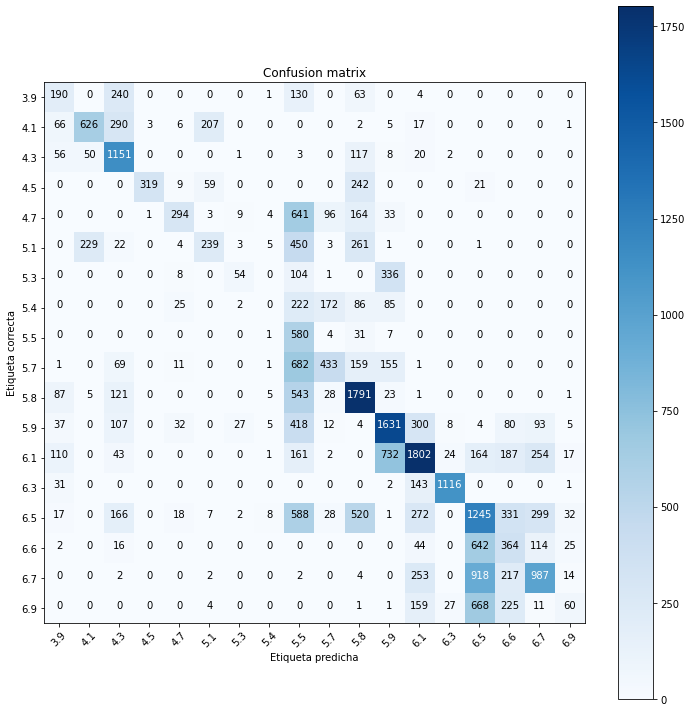

In [ ]:
cm = confusion_matrix(y_train, y_train_pred_sgd_optimo)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Train")
plot_confusion_matrix(cm, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

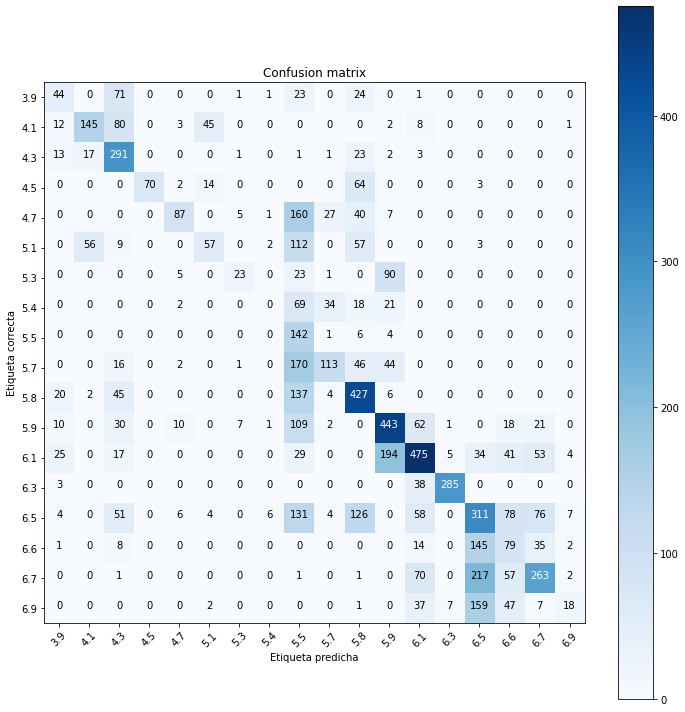

In [ ]:
cm2 = confusion_matrix(y_test, y_test_pred_sgd_optimo)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Test")
plot_confusion_matrix(cm2, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

##**2.2.DecisionTreeClassifier**. 
Idem anterior

In [ ]:
### Probamos el Decision Tree Classifier por defecto 
DTC = DecisionTreeClassifier(random_state=0)

### Entrenamos
DTC.fit(X_train, y_train)

### Predecimos
y_train_pred_DTC = DTC.predict(X_train)
y_test_pred_DTC= DTC.predict(X_test)

### Evaluamos
train_acc2 = accuracy_score(y_train, y_train_pred_DTC)
test_acc2 = accuracy_score(y_test, y_test_pred_DTC)

print(f'Train accuracy: {train_acc2:0.2}')
print(f'Test accuracy: {test_acc2:0.2}')



Train accuracy: 1.0
Test accuracy: 0.98


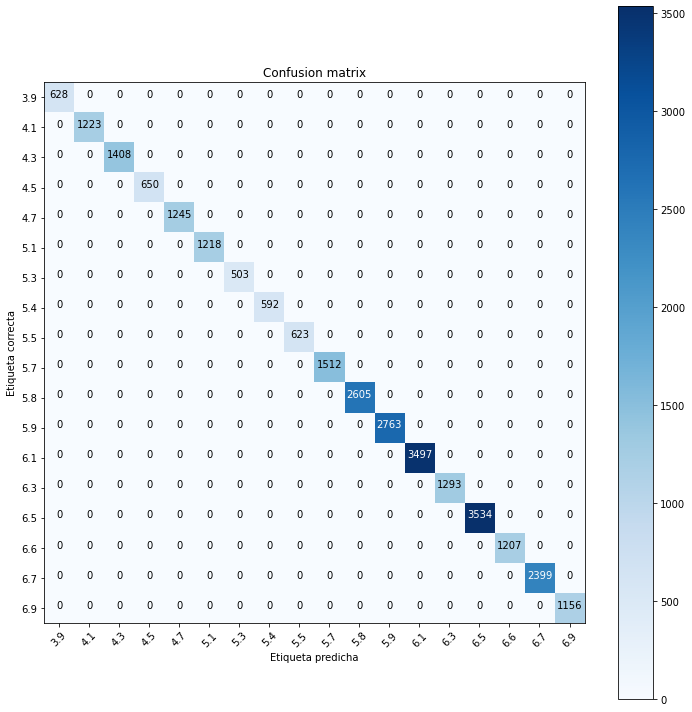

In [ ]:
cm3 = confusion_matrix(y_train, y_train_pred_DTC)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Train")
plot_confusion_matrix(cm3, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

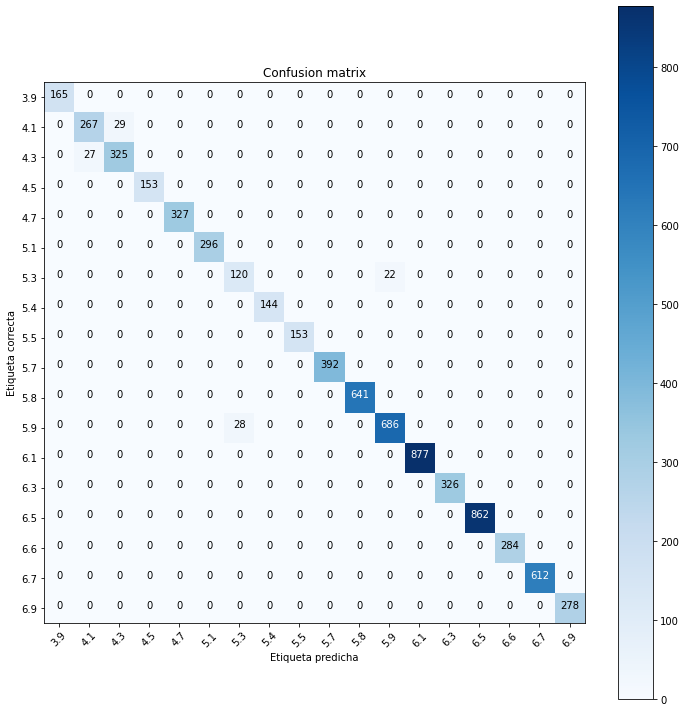

In [ ]:
cm4 = confusion_matrix(y_test, y_test_pred_DTC)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Train")
plot_confusion_matrix(cm4, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

In [ ]:
### Ajustamos hiperparametros ###
### Definimos grilla de parámetros

param_grid2 = { 'criterion'        : ['gini','entropy'],
              'splitter'         : ['best','random'],
              'max_depth'        : [10,15,20], 
              'max_features'     : ['auto','sqrt','log2']
}


In [ ]:
#DTC2 = DecisionTreeClassifier(random_state=0)

#cv2 = GridSearchCV(DTC2, param_grid2, scoring='accuracy', cv=5)

#cv2.fit(X_train, y_train);

In [ ]:
#results2 = cv2.cv_results_
#params = results2['params']
#mean = results2['mean_test_score']
#std = results2['std_test_score']
#rank = results2['rank_test_score']

In [ ]:
#df2 = pd.DataFrame(results2)
#df2[['param_criterion', 'param_splitter', 'param_max_depth','param_max_features','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')


,param_criterion,param_splitter,param_max_depth,param_max_features,mean_test_score,std_test_score,rank_test_score
32,entropy,best,20,sqrt,0.977224,0.003384,1
30,entropy,best,20,auto,0.977224,0.003384,1
34,entropy,best,20,log2,0.970202,0.003776,3
14,gini,best,20,sqrt,0.969810,0.003120,4
12,gini,best,20,auto,0.969810,0.003120,4
15,gini,random,20,sqrt,0.969668,0.005783,6
13,gini,random,20,auto,0.969668,0.005783,6
33,entropy,random,20,sqrt,0.969561,0.003946,8
31,entropy,random,20,auto,0.969561,0.003946,8
26,entropy,best,15,sqrt,0.968598,0.005130,10


In [ ]:
### Miramos el Mejor Modelos ####
#DTCOptimo = cv2.best_estimator_
#DTCOptimo

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
DTCOptimo = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
DTCOptimo.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
### Predecimos con el mejor modelo ####
y_train_pred_dtc_optimo= DTCOptimo.predict(X_train)
y_test_pred_dtc_optimo = DTCOptimo.predict(X_test)

In [ ]:
DTC_metrics = metricas(y_test, y_test_pred_dtc_optimo, model="Decission Tree Classifier All Features")

In [ ]:
CLF_TestMetrics = CLF_TestMetrics.append(DTC_metrics,  ignore_index=True)
print(CLF_TestMetrics)

         F1  accuracy  ... precision    recall
0  0.465177  0.466638  ...  0.533816  0.466638
1  0.971749  0.971628  ...  0.972084  0.971628

[2 rows x 5 columns]


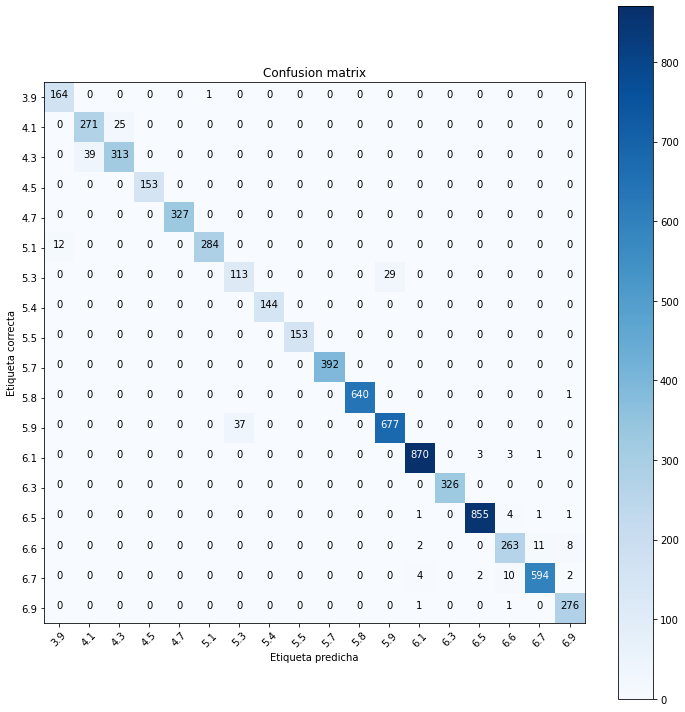

In [ ]:
cm5 = confusion_matrix(y_test, y_test_pred_dtc_optimo)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Test")
plot_confusion_matrix(cm5, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

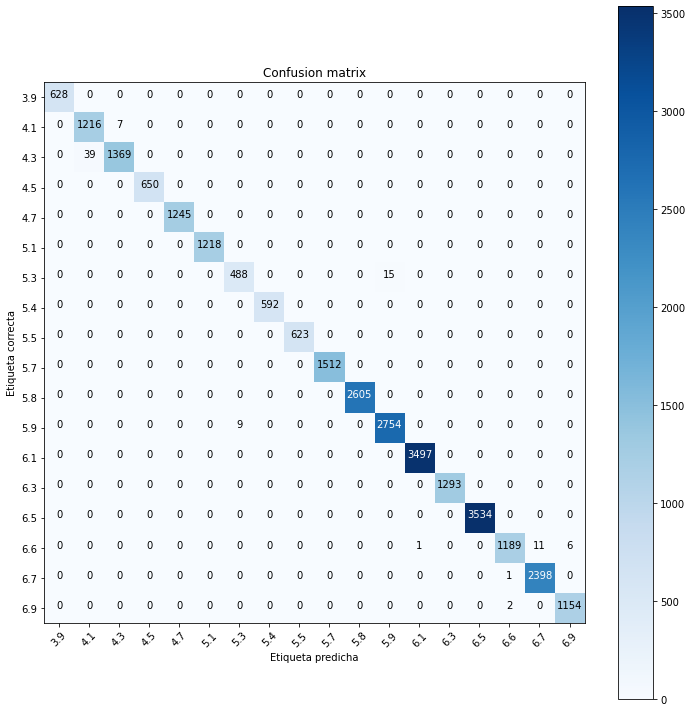

In [ ]:
cm6 = confusion_matrix(y_train, y_train_pred_dtc_optimo)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Train")
plot_confusion_matrix(cm6, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

Al ver que aun existe un posible ajuste, se compara el nro de nodo con la precison tanto para el set de validacion como para el set de entrenamiento.

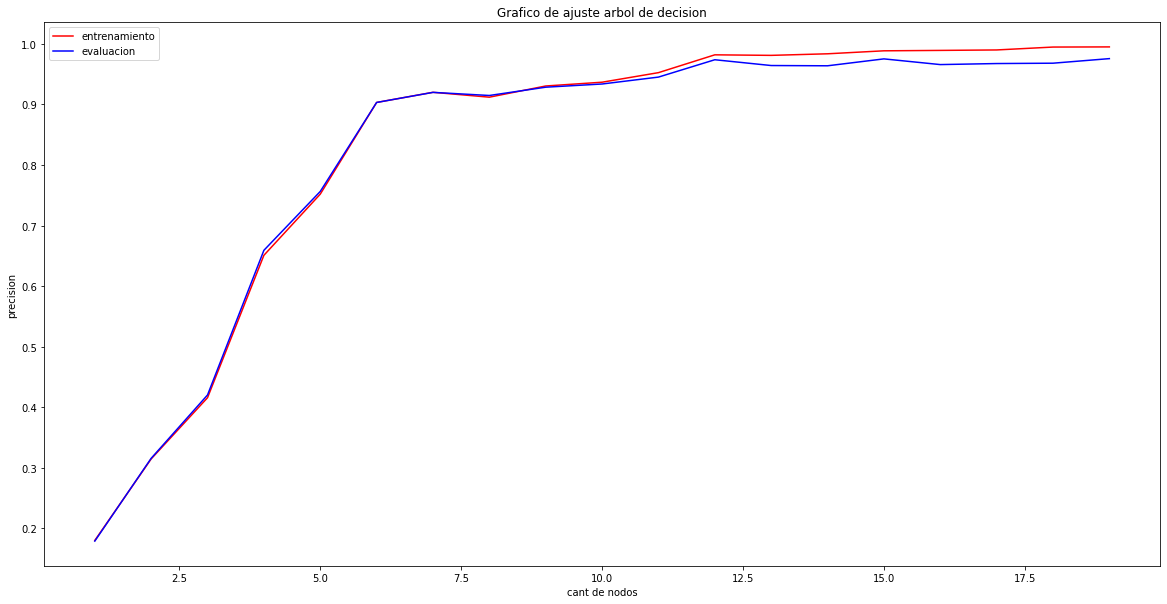

In [ ]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 20))

for deep in max_deep_list:
    arbol = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=deep, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
    arbol.fit(X_train, y_train)
    train_prec.append(arbol.score(X_train, y_train))
    eval_prec.append(arbol.score(X_test, y_test))

# graficar los resultados.
plt.figure(figsize=(20,10))
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cant de nodos')
plt.show()

Podemos ver que el punto con mayor precisión, en los datos de evaluación, lo obtenemos con un nivel de profundidad de aproximadamente 12 nodos; a partir de allí el modelo pierde en generalización y comienza a estar sobreajustado.

In [ ]:
### Nuevo arbol con los nodos definidos segun la grafica ###
DTCOptimo2=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
## Entrenamos
DTCOptimo2.fit(X_train, y_train)

### Predecimos
y_train_pred_dtcoptimo2 = DTCOptimo2.predict(X_train)
y_test_pred_dtcoptimo2= DTCOptimo2.predict(X_test)

### Evaluamos
train_acc5 = accuracy_score(y_train, y_train_pred_dtcoptimo2)
test_acc5 = accuracy_score(y_test, y_test_pred_dtcoptimo2)

print(f'Train accuracy: {train_acc5:0.2}')
print(f'Test accuracy: {test_acc5:0.2}')

Train accuracy: 0.98
Test accuracy: 0.97


## **2.3.Random Forest**
Ídem anterior

In [ ]:
### RandomForest por defecto
RF = RandomForestClassifier(random_state=0)

## Entrenamos
RF.fit(X_train, y_train)

### Predecimos
y_train_pred_RF = RF.predict(X_train)
y_test_pred_RF= RF.predict(X_test)


In [ ]:
RF_metrics = metricas(y_test, y_test_pred_RF, model= "Random Forest Classifier All Features")

In [ ]:
CLF_TestMetrics = CLF_TestMetrics.append(RF_metrics,  ignore_index=True)

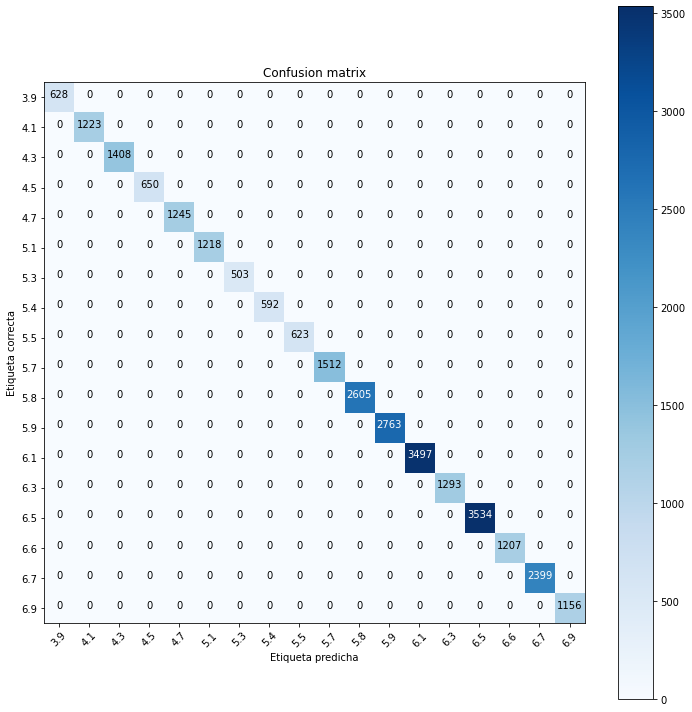

In [ ]:
cm7 = confusion_matrix(y_train, y_train_pred_RF)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Train")
plot_confusion_matrix(cm7, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

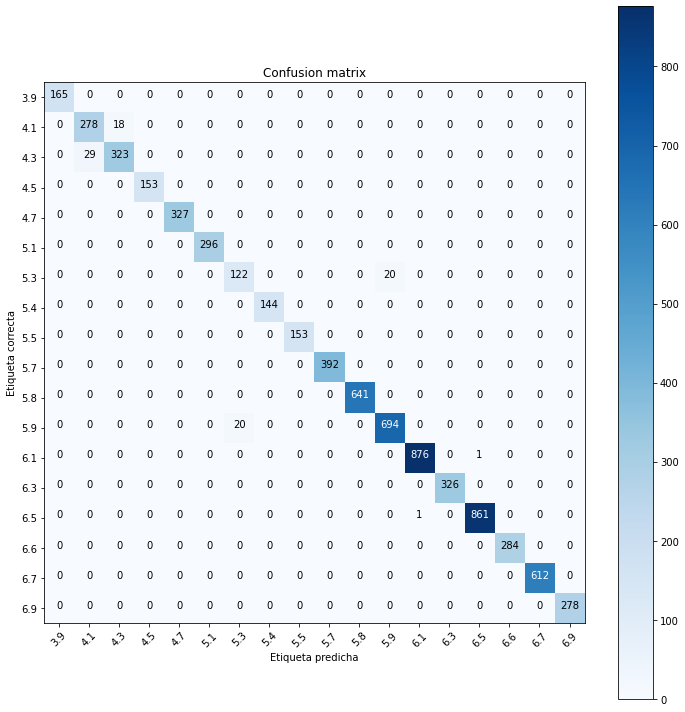

In [ ]:
cm8 = confusion_matrix(y_test, y_test_pred_RF)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Train")
plot_confusion_matrix(cm8, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

In [ ]:
importancia=pd.concat((pd.DataFrame(X_train.iloc[:, 0:].columns, columns = ['variable']), 
           pd.DataFrame(RF.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values('importance',ascending=False)
importancia

,variable,importance
2,Variedad,0.092987
27,T.min.Espig,0.068459
33,HR.prom.Espig,0.057159
34,HR.min.Espig,0.047236
28,T.max.Espig,0.045900
29,T.suelo.prom.Espig,0.044290
31,T.suelo.max.Espig,0.041956
30,T.suelo.min.Espig,0.041373
20,Dias.entre.fechas,0.040900
26,T.prom.Espig,0.038584


Text(0.5, 1.0, 'Importancia de las variables')

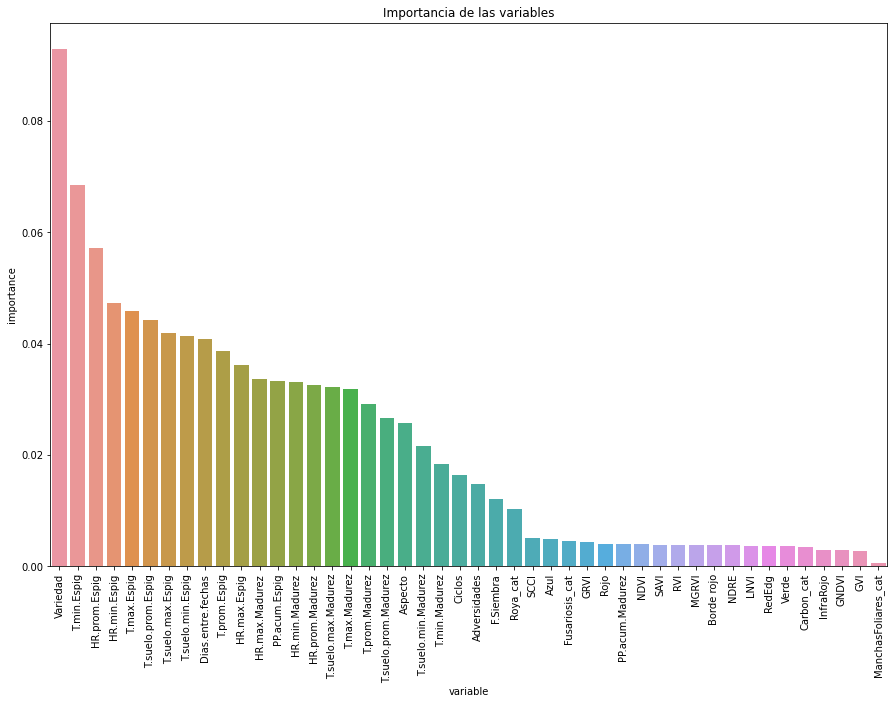

In [ ]:
plt.figure(figsize=(15,10))
grafico=sns.barplot(x='variable', y='importance', data=importancia)
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=90)
plt.title("Importancia de las variables")

###**2.4. Responder**

¿Qué diferencias hay entre los distintos modelos? ¿Qué tan buenas son las predicciones?

Jueguen un poco variando algunos parámetros (no es necesario hacer una búsqueda sistemática). ¿Qué parámetros influyen más en el desempeño de los clasificadores? ¿Por qué les parece que algunos parámetros influyen más que otros?

###**COMENTARIOS**
El SDGClassifier, por defecto nos da como resultados los siguientes valores Train accuracy: 0.057
Test accuracy: 0.055, luego de ajustar los hyperparametros del mismo los resultados presentan ganancia en la accuracy (Train accuracy: 0.46,
Test accuracy: 0.47), considerando el tiempo que lleva el proceso de busqueda de los parametros no consideramos como suficiente esta nivel de accuracy. En cambio el DDecisionTreeClassifier por defecto presento unps valores de Train accuracy: 1.0 y Test accuracy: 0.98, lo que podria indicar un overfiting o sobreajuste, al ajustar los hiperparametros estos resultados varian muy poco, siendo Train accuracy: 1.0 y Test accuracy: 0.97. Para reducir el efecto del sobreajuste, se decidio evaluar la precision segun los nodos del arbol y se observo que habia que disminuirlos de 20 a 12, y los resultados de dicha modificacion fueron Train accuracy: 0.98 y Test accuracy: 0.97
Y en cuanto a random forest, los resultado obtenidos con el modelo por defecto son Train accuracy: 1.0 y Test accuracy: 0.99, tambien se puede observar que la base de entrenamiento presenta overfiting, pero no hay diferencias entre ambos valores. 

Algo que vale la pena remarcar es la importacia de los features. Los que presentaron mayor importancia fueron, al igual que en el caso de la regresion y el RDTo, las variables climaticas y no tanto las bandas e indices derivados de la imagen de Dron, lo que queda por fuera del objetivo principal de este trabajo.



###**3.Opcional**

###**3.1. Multinomial Naives Bayes**

###**3.2. KNN**

In [ ]:
### Por defecto ###
KNN= KNeighborsClassifier()

## Entrenamos
KNN.fit(X_train, y_train)

### Predecimos
y_train_pred_knn = KNN.predict(X_train)
y_test_pred_knn= KNN.predict(X_test)

### Evaluamos
train_acc8 = accuracy_score(y_train, y_train_pred_knn)
test_acc8 = accuracy_score(y_test, y_test_pred_knn)

print(f'Train accuracy: {train_acc8:0.2}')
print(f'Test accuracy: {test_acc8:0.2}')

Train accuracy: 0.46
Test accuracy: 0.22


In [ ]:
### Ajustamos hiperparametros ###
### Definimos grilla de parámetros de loss, tasa de entrenamiento y regularización

param_gridknn = { 'n_neighbors'        : [5,10,15,20,30,40,50],
              'weights'         : ['uniform','distance'],
              'algorithm'        : ['auto','ball_tree','kd_tree','brute']
}

In [ ]:
#KNN2 = KNeighborsClassifier()

#cvknn = GridSearchCV(KNN2, param_gridknn, scoring='accuracy', cv=5)

#cvknn.fit(X_train, y_train);

In [ ]:
#resultsknn = cvknn.cv_results_
#params = resultsknn['params']
#mean = resultsknn['mean_test_score']
#std = resultsknn['std_test_score']
#rank = resultsknn['rank_test_score']

In [ ]:
#dfknn = pd.DataFrame(resultsknn)
#dfknn[['param_n_neighbors', 'param_weights', 'param_algorithm','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')


,param_n_neighbors,param_weights,param_algorithm,mean_test_score,std_test_score,rank_test_score
53,40,distance,brute,0.271492,0.004233,1
39,40,distance,kd_tree,0.271492,0.004233,1
25,40,distance,ball_tree,0.271492,0.004233,1
11,40,distance,auto,0.271492,0.004233,1
27,50,distance,ball_tree,0.271421,0.004485,5
41,50,distance,kd_tree,0.271421,0.004485,5
13,50,distance,auto,0.271421,0.004485,5
55,50,distance,brute,0.271421,0.004485,5
9,30,distance,auto,0.269532,0.004028,9
37,30,distance,kd_tree,0.269532,0.004028,9


In [ ]:
### Miramos el Mejor Modelos ####
#KnnOptimo = cvknn.best_estimator_
#KnnOptimo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='distance')

In [ ]:
KnnOptimo = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='distance')

In [ ]:
### Fitting
KnnOptimo.fit(X_train, y_train)

### Predecimos con el mejor modelo ####
y_train_pred_knn_optimo= KnnOptimo.predict(X_train)
y_test_pred_knn_optimo = KnnOptimo.predict(X_test)


In [ ]:
KNN_metrics = metricas(y_test, y_test_pred_knn_optimo, model= "KNN Classifier All Features")

CLF_TestMetrics = CLF_TestMetrics.append(KNN_metrics,  ignore_index=True)

In [ ]:

### Evaluamos ####
train_accknn = accuracy_score(y_train, y_train_pred_knn_optimo)
test_accknn = accuracy_score(y_test, y_test_pred_knn_optimo)

print(f'Train accuracy: {train_accknn:0.2}')
print(f'Test accuracy: {test_accknn:0.2}')

Train accuracy: 1.0
Test accuracy: 0.27


Como se puede observar, el modelo presenta overfiting. 


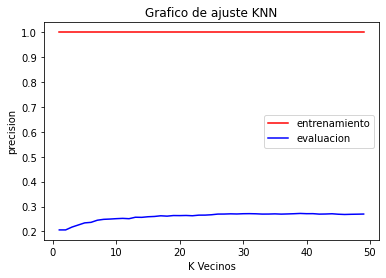

In [ ]:
### Grafico de Ajuste ###
train_prec2 =  []
eval_prec2 = []
n_neighbors_list = list(range(1, 50))

for k in n_neighbors_list:
    knn3 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=k, p=2,
                     weights='distance')
    knn3.fit(X_train, y_train)
    train_prec2.append(knn3.score(X_train, y_train))
    eval_prec2.append(knn3.score(X_test, y_test))

# graficar los resultados.
plt.plot(n_neighbors_list, train_prec2, color='r', label='entrenamiento')
plt.plot(n_neighbors_list, eval_prec2, color='b', label='evaluacion')
plt.title('Grafico de ajuste KNN')
plt.legend()
plt.ylabel('precision')
plt.xlabel('K Vecinos')
plt.show()

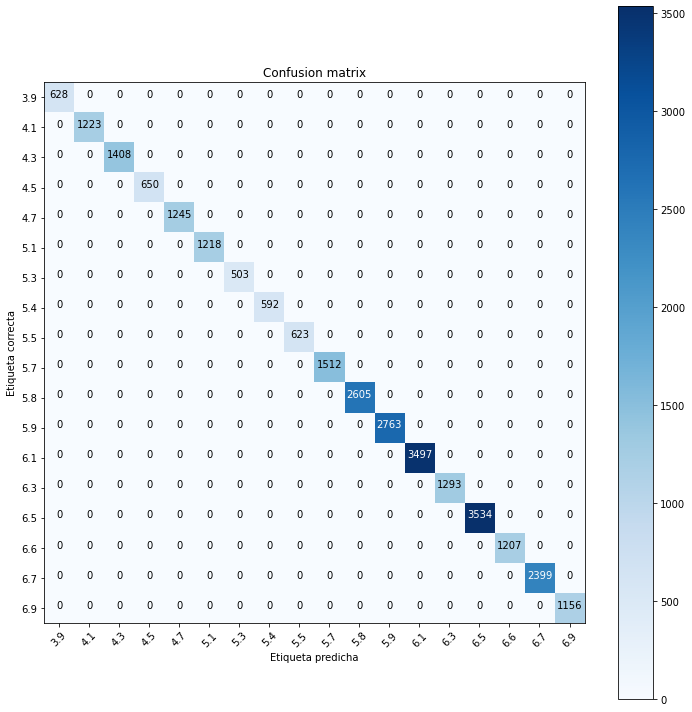

In [ ]:
cmknn1 = confusion_matrix(y_train, y_train_pred_knn_optimo)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Train")
plot_confusion_matrix(cmknn1, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

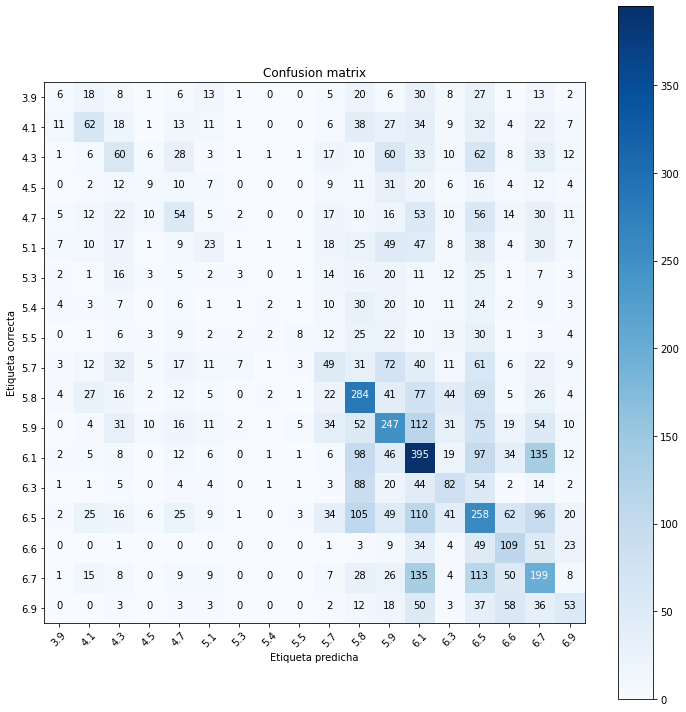

In [ ]:
cmknn2 = confusion_matrix(y_test, y_test_pred_knn_optimo)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Train")
plot_confusion_matrix(cmknn2, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

#**Vamos a analizar los resultados, solo con las variables derivadas de la imagen de dron.**#




In [ ]:
X, y = dataset.iloc[:, 5:21], dataset.ZADOCK
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, X_test.shape

((28056, 16), (7014, 16))

In [ ]:
X_train

,Azul,Verde,InfraRojo,Borde rojo,Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdg,LNVI,GRVI,MGRVI
31427,55600,14260,55900,41620,20409,0.4650,0.1464,0.6976,0.3148,0.5935,3.9200,2.7389,1.3431,0.2949,-0.1773,-0.3439
9298,51800,11870,49700,29090,12483,0.5985,0.2615,0.8977,0.4370,0.6144,4.1870,3.9814,1.7084,0.5356,-0.0251,-0.0503
7919,52700,12970,45800,31330,16925,0.4603,0.1876,0.6905,0.4075,0.5586,3.5312,2.7060,1.4618,0.3797,-0.1322,-0.2600
23512,60900,14120,65700,36510,16918,0.5904,0.2855,0.8856,0.4836,0.6462,4.6529,3.8834,1.7995,0.5875,-0.0901,-0.1788
27292,62100,16310,73200,47950,20532,0.5618,0.2084,0.8428,0.3709,0.6355,4.4880,3.5651,1.5265,0.4230,-0.1145,-0.2262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,50500,12050,57600,30430,14972,0.5873,0.3086,0.8810,0.5254,0.6539,4.7800,3.8471,1.8928,0.6380,-0.1081,-0.2137
32103,57400,13150,57200,35770,18762,0.5060,0.2305,0.7590,0.4555,0.6261,4.3498,3.0487,1.5991,0.4694,-0.1758,-0.3411
30403,49400,12230,46100,32440,16406,0.4750,0.1739,0.7125,0.3661,0.5806,3.7694,2.8099,1.4210,0.3514,-0.1458,-0.2855
21243,53000,11170,43500,26560,14137,0.5094,0.2417,0.7641,0.4746,0.5913,3.8943,3.0770,1.6378,0.4933,-0.1172,-0.2313


###**SGDClassifier Dron Features con selección de hiperparámetros**. 



In [ ]:
### Ajuste de hiperparametros

### Definimos la grilla
param_gridsgd = { 'loss'          : ['hinge','log','squared_hinge','perceptron'],
              'penalty'       : ['l2','l1','elasticnet', 'none'],
              'learning_rate' : ['optimal','adaptive','invscaling', 'adaptive'],
              'eta0'          : [0.1, 0.5, 1]
              }


In [ ]:
# Hacemos la validación cruzada sobre la grilla de parámetros
#SGDc3 = SGDClassifier(random_state=0)

#cvsgd3 = GridSearchCV(SGDc3, param_gridsgd, scoring='accuracy', cv=5)

#cvsgd3.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
#resultssgd3 = cvsgd3.cv_results_
#params = resultssgd3['params']
#mean = resultssgd3['mean_test_score']
#std = resultssgd3['std_test_score']
#rank = resultssgd3['rank_test_score']

In [ ]:
#dfsgd = pd.DataFrame(resultssgd3)
#dfsgd[['param_loss', 'param_penalty', 'param_learning_rate','param_eta0','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')


,param_loss,param_penalty,param_learning_rate,param_eta0,mean_test_score,std_test_score,rank_test_score
113,hinge,l1,adaptive,0.5,0.172513,0.011989,1
81,hinge,l1,adaptive,0.5,0.172513,0.011989,1
177,hinge,l1,adaptive,1,0.157471,0.016380,3
145,hinge,l1,adaptive,1,0.157471,0.016380,3
95,perceptron,none,adaptive,0.5,0.150698,0.017400,5
...,...,...,...,...,...,...,...
27,squared_hinge,none,adaptive,0.1,0.086400,0.027659,187
33,hinge,l1,invscaling,0.1,0.085259,0.031434,189
34,hinge,elasticnet,invscaling,0.1,0.076420,0.029385,190
184,squared_hinge,l2,adaptive,1,0.070110,0.021101,191


In [ ]:
#SGD3Optimo = cvsgd3.best_estimator_
#SGD3Optimo

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
SGD3Optimo = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
### Fitting
SGD3Optimo.fit(X_train, y_train)

### Predecimos con el mejor modelo ####
y_train_pred_sgd3_optimo= SGD3Optimo.predict(X_train)
y_test_pred_sgd3_optimo = SGD3Optimo.predict(X_test)



In [ ]:
sgd_metricas_dron = metricas(y_test, y_test_pred_sgd3_optimo, model= "SGD Classifier Dron Features")

CLF_TestMetrics = CLF_TestMetrics.append(sgd_metricas_dron, ignore_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
### Evaluamos ####
train_accsgd3 = accuracy_score(y_train, y_train_pred_sgd3_optimo)
test_accsgd3 = accuracy_score(y_test, y_test_pred_sgd3_optimo)

print(f'Train accuracy: {train_accsgd3:0.2}')
print(f'Test accuracy: {test_accsgd3:0.2}')

Train accuracy: 0.16
Test accuracy: 0.16


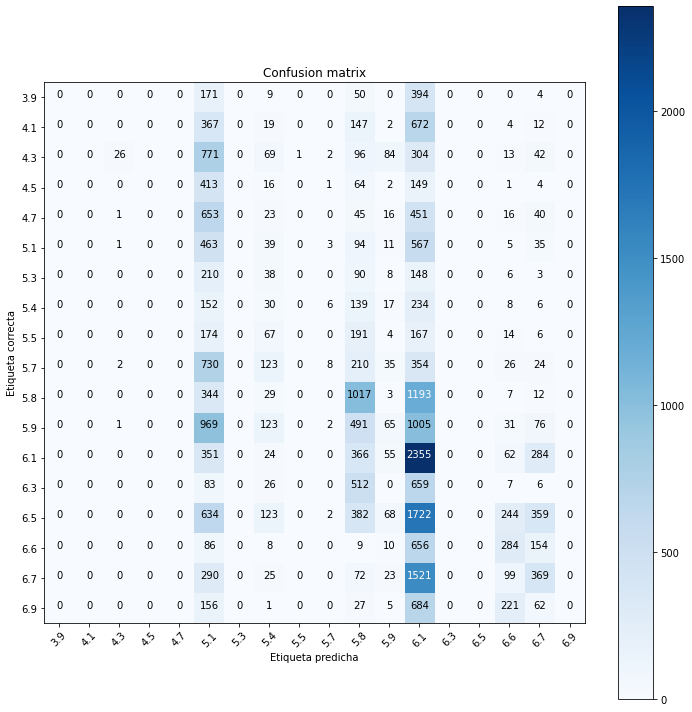

In [ ]:
cmsgd3 = confusion_matrix(y_train, y_train_pred_sgd3_optimo)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Test")
plot_confusion_matrix(cmsgd3, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

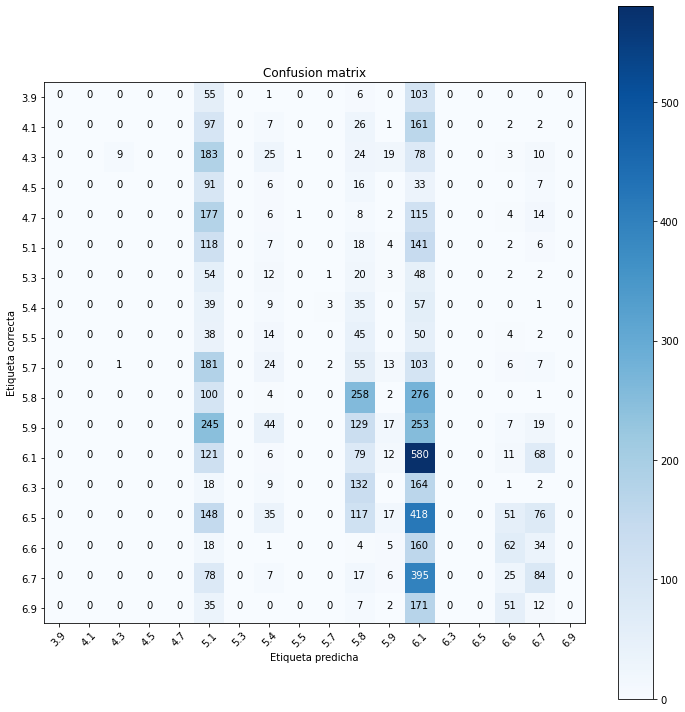

In [ ]:
cmsgd4 = confusion_matrix(y_test, y_test_pred_sgd3_optimo)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Test")
plot_confusion_matrix(cmsgd4, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

###**Decision Tree Classifier Dron Features**. 






In [ ]:
param_griddtc2 = { 'criterion'        : ['gini','entropy'],
              'splitter'         : ['best','random'],
              'max_depth'        : [10,15,20], 
              'max_features'     : ['auto','sqrt','log2']
}


In [ ]:
#DTC3 = DecisionTreeClassifier(random_state=0)

#cvdtc3 = GridSearchCV(DTC3, param_griddtc2, scoring='accuracy', cv=5)

#cvdtc3.fit(X_train, y_train);

In [ ]:
#resultsdtc3 = cvdtc3.cv_results_
#params = resultsdtc3['params']
#mean = resultsdtc3['mean_test_score']
#std = resultsdtc3['std_test_score']
#rank = resultsdtc3['rank_test_score']

In [ ]:
#dfdtc = pd.DataFrame(resultsdtc3)
#dfdtc[['param_criterion', 'param_splitter', 'param_max_depth','param_max_features','mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')


,param_criterion,param_splitter,param_max_depth,param_max_features,mean_test_score,std_test_score,rank_test_score
0,gini,best,10,auto,0.248930,0.004243,1
2,gini,best,10,sqrt,0.248930,0.004243,1
4,gini,best,10,log2,0.248930,0.004243,1
20,entropy,best,10,sqrt,0.239592,0.003116,4
22,entropy,best,10,log2,0.239592,0.003116,4
18,entropy,best,10,auto,0.239592,0.003116,4
3,gini,random,10,sqrt,0.230361,0.002652,7
1,gini,random,10,auto,0.230361,0.002652,7
5,gini,random,10,log2,0.230361,0.002652,7
19,entropy,random,10,auto,0.225905,0.003140,10


In [ ]:
#DTC3Optimo = cvdtc3.best_estimator_
#DTC3Optimo

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
DTC3Optimo = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
### Fitting
DTC3Optimo.fit(X_train, y_train)

### Predecimos con el mejor modelo ####
y_train_pred_dtc3_optimo= DTC3Optimo.predict(X_train)
y_test_pred_dtc3_optimo = DTC3Optimo.predict(X_test)


In [ ]:

### Evaluamos ####
train_accdtc3 = accuracy_score(y_train, y_train_pred_dtc3_optimo)
test_accdtc3 = accuracy_score(y_test, y_test_pred_dtc3_optimo)

print(f'Train accuracy: {train_accdtc3:0.2}')
print(f'Test accuracy: {test_accdtc3:0.2}')

Train accuracy: 0.35
Test accuracy: 0.24


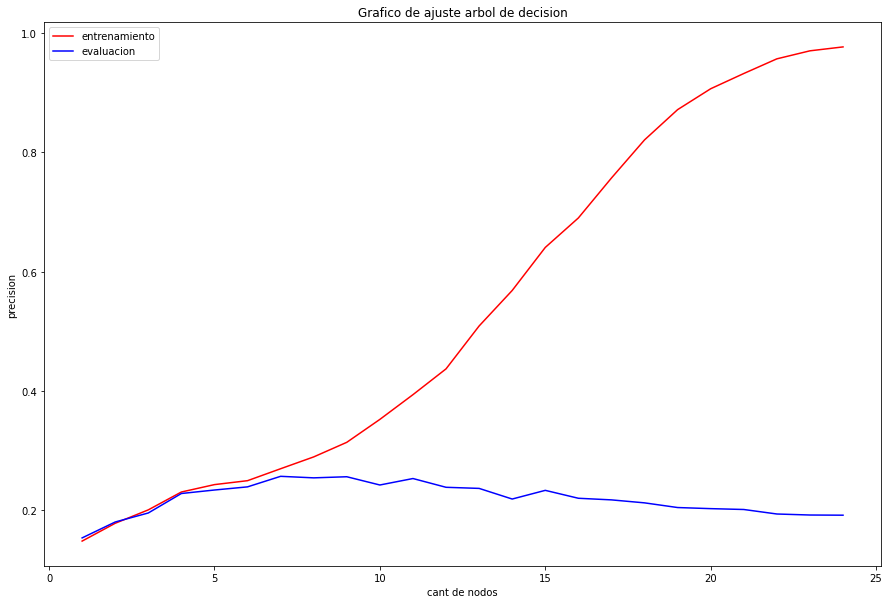

In [ ]:
# Grafico de ajuste del árbol de decisión
train_prec3 =  []
eval_prec3= []
max_deep_list2 = list(range(1, 25))

for deep in max_deep_list2:
    arbol3 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=deep, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
    arbol3.fit(X_train, y_train)
    train_prec3.append(arbol3.score(X_train, y_train))
    eval_prec3.append(arbol3.score(X_test, y_test))

# graficar los resultados.
plt.figure(figsize=(15,10))
plt.plot(max_deep_list2, train_prec3, color='r', label='entrenamiento')
plt.plot(max_deep_list2, eval_prec3, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cant de nodos')
plt.show()

Con nodos mayor a 5, el modelo empieza a presentar overfitting. 


In [ ]:
### Nuevo arbol con los nodos definidos segun la grafica ###
DTCOptimo4=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
## Entrenamos
DTCOptimo4.fit(X_train, y_train)

### Predecimos
y_train_pred_dtcoptimo4 = DTCOptimo4.predict(X_train)
y_test_pred_dtcoptimo4= DTCOptimo4.predict(X_test)



In [ ]:
DTC_dron_metricas = metricas(y_test, y_test_pred_dtcoptimo4, model= "Decission Tree Classifier Dron Features")

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
CLF_TestMetrics = CLF_TestMetrics.append(DTC_dron_metricas, ignore_index=True)

In [ ]:
### Evaluamos
train_accdtc = accuracy_score(y_train, y_train_pred_dtcoptimo4)
test_accdtc = accuracy_score(y_test, y_test_pred_dtcoptimo4)

print(f'Train accuracy: {train_accdtc:0.2}')
print(f'Test accuracy: {test_accdtc:0.2}')

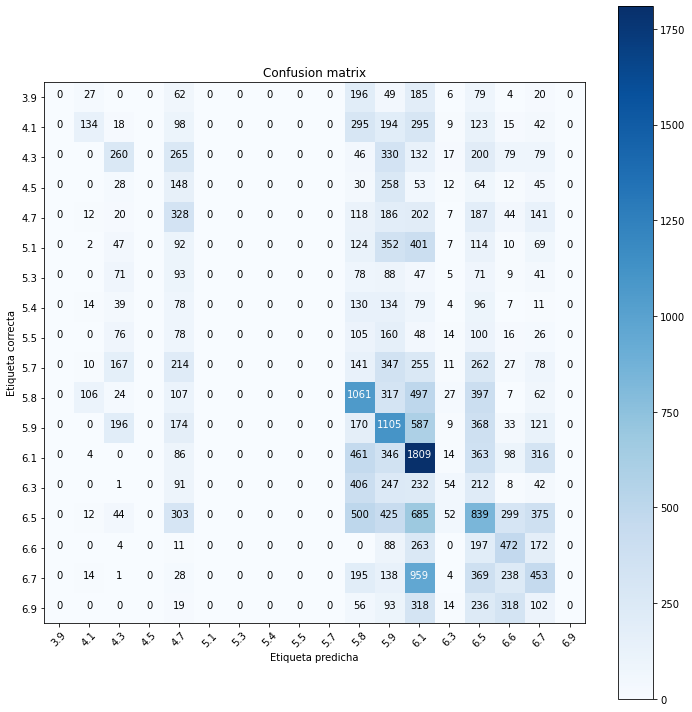

In [ ]:
cmdtc3 = confusion_matrix(y_train, y_train_pred_dtcoptimo4)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Test")
plot_confusion_matrix(cmdtc3, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

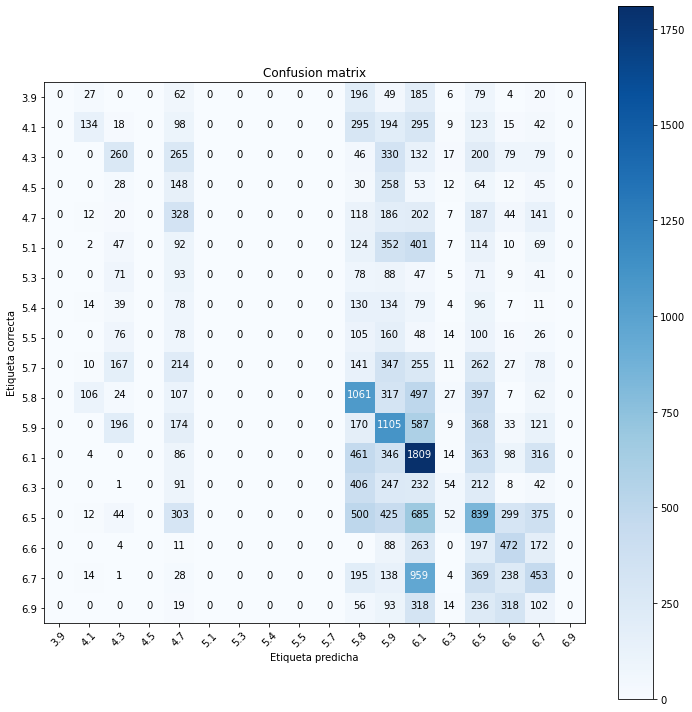

In [ ]:
cmdtc4 = confusion_matrix(y_test, y_test_pred_dtcoptimo4)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Test")
plot_confusion_matrix(cmdtc3, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

Eliminado el problema de overfitting, la accuracy sigue siendo baja. 

##**Random Forest**##


In [ ]:
### RandomForest por defecto
RF2 = RandomForestClassifier(random_state=0)

## Entrenamos
RF2.fit(X_train, y_train)

### Predecimos
y_train_pred_RF2 = RF2.predict(X_train)
y_test_pred_RF2= RF2.predict(X_test)

### Evaluamos
train_accrf2 = accuracy_score(y_train, y_train_pred_RF2)
test_accrf2 = accuracy_score(y_test, y_test_pred_RF2)

print(f'Train accuracy: {train_accrf2:0.2}')
print(f'Test accuracy: {test_accrf2:0.2}')

Train accuracy: 1.0
Test accuracy: 0.28


Con el modelo por defecto se presenta overfitting. 

In [ ]:
### Ajuste hiperparametros 
param_gridrf= { 'criterion'        : ['gini','entropy'],
               'max_features'     : ['auto','sqrt','log2'],
}

In [ ]:
#RF3 = RandomForestClassifier(random_state=0)

#cvrf3 = GridSearchCV(RF3, param_gridrf, scoring='accuracy', cv=5)

#cvrf3.fit(X_train, y_train);

In [ ]:
#resultsrf3 = cvrf3.cv_results_
#params = resultsrf3['params']
#mean = resultsrf3['mean_test_score']
#std = resultsrf3['std_test_score']
#rank = resultsrf3['rank_test_score']

In [ ]:
#dfrf3 = pd.DataFrame(resultsdtc3)
#dfrf3[['param_criterion', 'param_max_features', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_criterion,param_max_features,mean_test_score,std_test_score,rank_test_score
0,gini,auto,0.248930,0.004243,1
2,gini,sqrt,0.248930,0.004243,1
4,gini,log2,0.248930,0.004243,1
20,entropy,sqrt,0.239592,0.003116,4
22,entropy,log2,0.239592,0.003116,4
18,entropy,auto,0.239592,0.003116,4
3,gini,sqrt,0.230361,0.002652,7
1,gini,auto,0.230361,0.002652,7
5,gini,log2,0.230361,0.002652,7
19,entropy,auto,0.225905,0.003140,10


In [ ]:
#RF3Optimo = cvrf3.best_estimator_
#RF3Optimo

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
RF3Optimo = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
RF3Optimo.fit(X_train, y_train)

In [ ]:
### Predecimos con el mejor modelo ####
y_train_pred_rf3_optimo= RF3Optimo.predict(X_train)
y_test_pred_rf3_optimo = RF3Optimo.predict(X_test)

### Evaluamos ####
train_accrf3 = accuracy_score(y_train, y_train_pred_rf3_optimo)
test_accrf3 = accuracy_score(y_test, y_test_pred_rf3_optimo)

print(f'Train accuracy: {train_accrf3:0.2}')
print(f'Test accuracy: {test_accrf3:0.2}')

Train accuracy: 1.0
Test accuracy: 0.28


- Al ajustar los hiperparametros se observa que el problema de overfitting continua, se procede a analizar la precision en funcion del max_depth que es la profundidad máxima del árbol

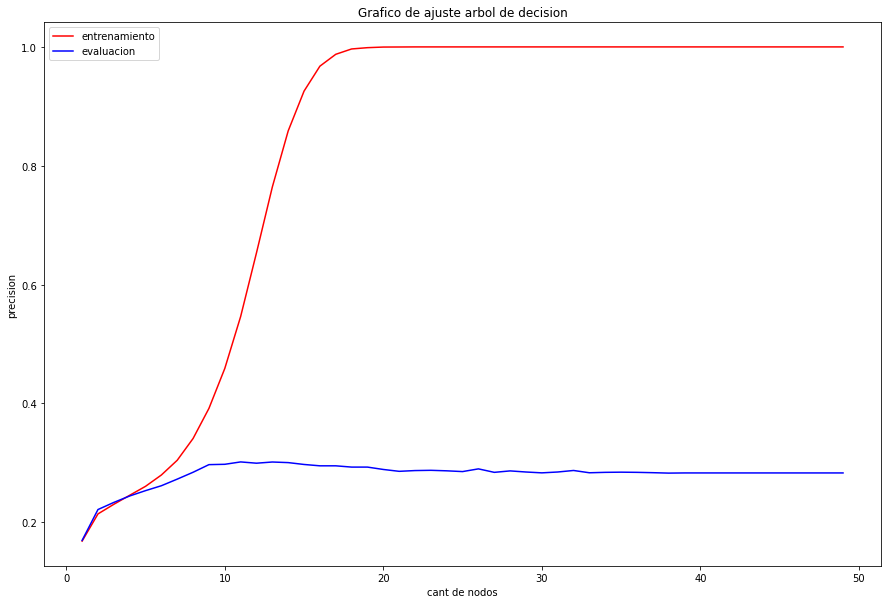

In [ ]:
train_prec4 =  []
eval_prec4= []
max_deep_list4 = list(range(1, 50))

for deep in max_deep_list4:
    rf4 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=deep, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
    rf4.fit(X_train, y_train)
    train_prec4.append(rf4.score(X_train, y_train))
    eval_prec4.append(rf4.score(X_test, y_test))

# graficar los resultados.
plt.figure(figsize=(15,10))
plt.plot(max_deep_list4, train_prec4, color='r', label='entrenamiento')
plt.plot(max_deep_list4, eval_prec4, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cant de nodos')
plt.show()

In [ ]:
### Nuevo arbol con los nodos definidos segun la grafica ###
RFOptimo4=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
## Entrenamos
RFOptimo4.fit(X_train, y_train)

### Predecimos
y_train_pred_rfoptimo4 = RFOptimo4.predict(X_train)
y_test_pred_rfoptimo4= RFOptimo4.predict(X_test)


In [ ]:
RF_dron_metricas= metricas(y_test, y_test_pred_rfoptimo4, model="Random Forest Classifier Dron Features")

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
CLF_TestMetrics = CLF_TestMetrics.append(RF_dron_metricas, ignore_index=True)

In [ ]:

### Evaluamos
train_accrf = accuracy_score(y_train, y_train_pred_rfoptimo4)
test_accrf = accuracy_score(y_test, y_test_pred_rfoptimo4)

print(f'Train accuracy: {train_accrf:0.2}')
print(f'Test accuracy: {test_accrf:0.2}')

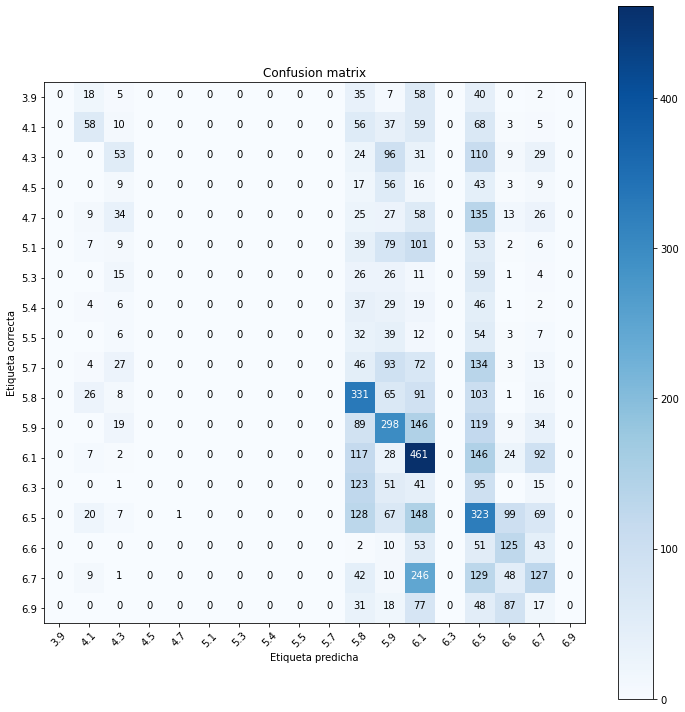

In [ ]:
cmrf4 = confusion_matrix(y_test, y_test_pred_rfoptimo4)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Test")
plot_confusion_matrix(cmrf4, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

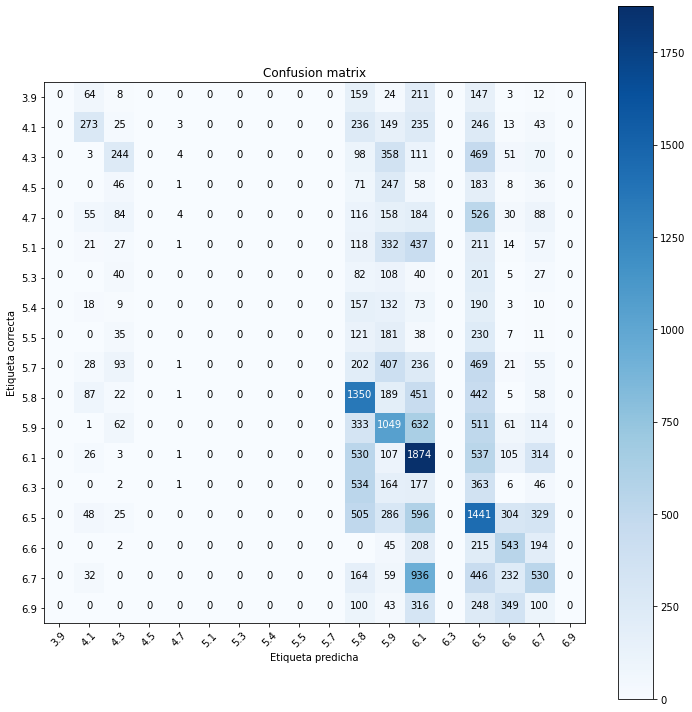

In [ ]:
cmrf5 = confusion_matrix(y_train, y_train_pred_rfoptimo4)
plt.figure(figsize=(10,10))
plt.title("Matriz Confusion - Set Test")
plot_confusion_matrix(cmrf5, ['3.9', '4.1', '4.3','4.5','4.7','5.1','5.3','5.4','5.5', '5.7', '5.8','5.9','6.1','6.3','6.5','6.6','6.7','6.9'])

In [ ]:
importancia2=pd.concat((pd.DataFrame(X_train.iloc[:, 0:].columns, columns = ['variable']), 
           pd.DataFrame(RFOptimo4.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values('importance',ascending=False)
importancia2

,variable,importance
15,MGRVI,0.107507
14,GRVI,0.106648
1,Verde,0.084142
0,Azul,0.082717
11,RVI,0.082226
12,RedEdg,0.080968
13,LNVI,0.073095
8,SCCI,0.071981
3,Borde rojo,0.062823
6,NDRE,0.059990


Text(0.5, 1.0, 'Importancia de las variables')

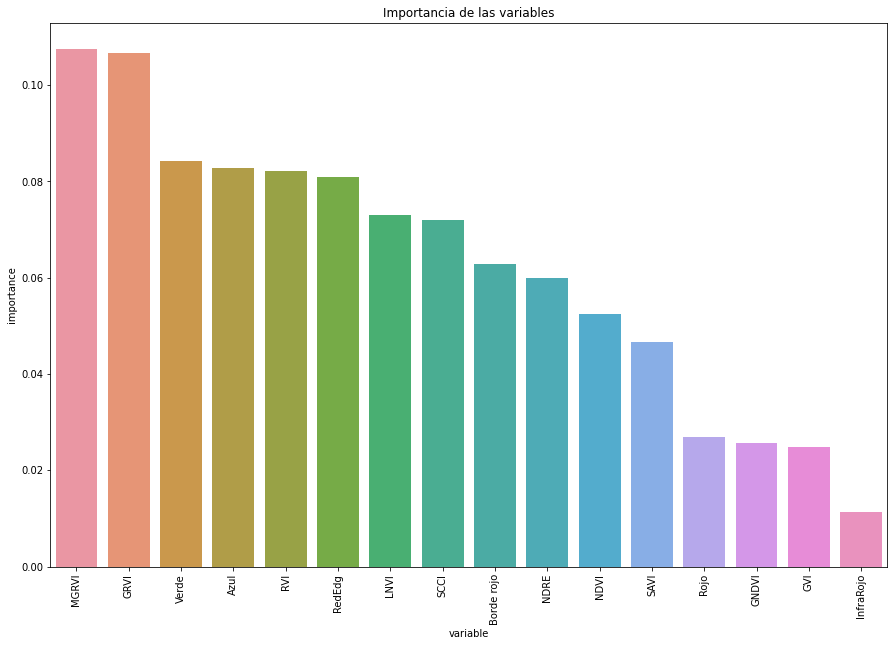

In [ ]:
plt.figure(figsize=(15,10))
grafico=sns.barplot(x='variable', y='importance', data=importancia2)
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=90)
plt.title("Importancia de las variables")

##**COMENTARIOS**##
Al tratar de clasificar los estados fenologicos (ZADOCK), solamente con las bandas e indices derivados de la imagen del dron, los valores no son muy buenos. 
Para el caso de SGD los valores fueron Train accuracy: 0.16 y para Test accuracy: 0.16, para DecisionTreeClassifier Train accuracy: 0.23 y Test accuracy: 0.23, ambos con los hiperparametros ajustados.
En el caso de Random forest, sin ajustar hiperparametros,los valores fueron Train accuracy: 1.0 y Test accuracy: 0.28. Despues de corregir el overfitting y ajustar los hiperparametros los valores fueron Train accuracy: 0.26 y Test accuracy: 0.25.

El random forest fue el mejor modelo de clasificacion, pero igual sus valores son bajos comparados al usar la base con los datos climaticos. 

Los indices de mayor importancia para la clasificacion fueron:MGRVI y GRVI, las bandas verde	y	Azul. 

##**Diplomatura en Ciencias de Datos, Aprendizaje Automático y sus Aplicaciones**

##**Mentoría Diplomatura en Ciencia de Datos 2020**
###**"Detección del desarrollo del cultivo con imágenes de Drones"**
###**Mentora**: Carolina Del Pilar Díaz

##**Aprendizaje Automático**

*El objetivo de este práctico es afianzar los conocimientos adquiridos hasta este momento, haciendo un proceso de re-análisis de los datos para encarar desde distintas perspectivas (selección de features, redefinición de clases y subclases) para conseguir nuevos resultados sobre los modelos ya trabajados, añadiendo ensemble learning al análisis.*

*La idea es aprender a iterar en el proceso de ciencia de datos, no quedandonos con los resultados obtenidos del primer proceso realizado.*

##**Enunciado**

Se les da la libertad de hacer los análisis que consideren necesarios en base a lo ya aprendido, encarando el problema desde distintos puntos de vista sobre todo en el proceso de los datos.

Se les dá la libertad de seleccionar una de las Targets o ambas para aplicar los algoritmos.

Se desea generar perspectivas diferentes que amplíen desde la investigación los resultados ya obtenidos.

Generar un informe del enfoque que se tomó y cuales son las conclusiones a las que se arribó.

Se pide también que sumen aquellos algoritmos en la medida de lo posible (por la cantidad de datos) aprendidos en AS de la familia de Ensemble Learning

## XGBoost for classification

In [ ]:
import xgboost as xgb

XGB requiere especificar como argumento el número de clases de la Target, en este caso =18. 


In [ ]:
clf_xgb= xgb.XGBClassifier(objective= "multi:softmax", seed= 42, num_class= 18)

In [ ]:
X, y = dataset.iloc[:, 2:], dataset.ZADOCK
y = preproc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(X_train.shape, X_test.shape)

(28056, 46) (7014, 46)


## Caso 1: Todos los features.

A continuación el primer grid search. Para optimizar se utilizan diferentes valores de los parámetros _max_depth_, _learning_rate_ y _reg_lambda_ (parámetro de regularización l2).

In [ ]:
#ParamGrid_1
param_grid1= {"max_depth" : [6, 12],
             "learning_rate": [0.1, 0.3],
             "early_stopping_rounds" : [10],
             "reg_lambda" : [0, 1.0] #parámetro de regularización l2
}

xgb_grid= GridSearchCV(estimator=clf_xgb, 
                           param_grid= param_grid1,
                           scoring= "accuracy",
                           verbose= 0,
                           cv= 5)

Dado el tiempo de ejecución del modelo, en pos de hacer más reproducible la notebook, una vez obtenido el mejor modelo se lo condensa en la variable _best_xgb_ para luego realizar el fit.

In [ ]:
#xgb_grid.fit(X_train, y_train)

In [ ]:
#best_xgb = xgb_grid.best_estimator_
#print(best_xgb)

Modelo óptimo obtenido del GridSearch.

In [ ]:
best_xgb= xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=18, objective='multi:softprob', early_stopping_rounds=10,
              random_state=0, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1,
              seed=42, silent=None, subsample=1, verbosity=1)


Fitting & Prediction

In [ ]:
best_xgb.fit(X_train, y_train)

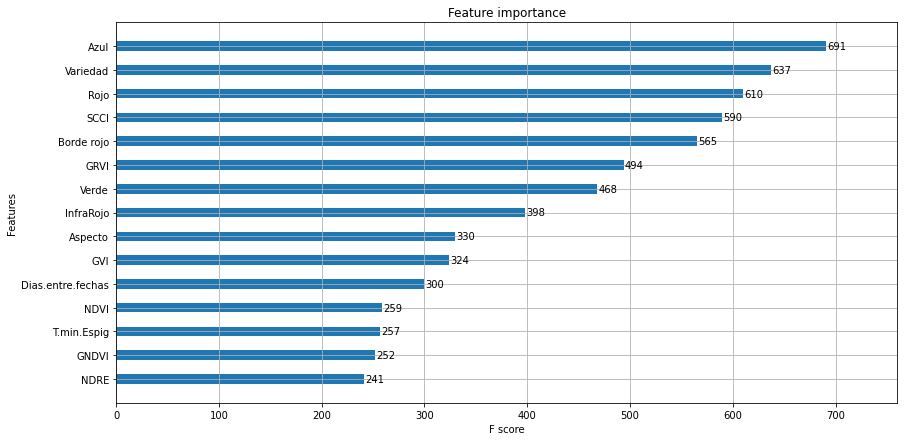

In [ ]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (14, 7)
plot_importance(best_xgb, height=0.4, max_num_features=15)

In [ ]:
y_train_pred_xgb = best_xgb.predict(X_train)
y_test_pred_xgb = best_xgb.predict(X_test)

Acurracy Score

In [ ]:
acc_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
acc_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
print("accuracy of train subset for best_xgb1:", acc_train_xgb)
print("accuracy of test subset for best_xgb1:", acc_test_xgb)

accuracy of train subset for best_xgb1: 1.0
accuracy of test subset for best_xgb1: 0.9884516680923866


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score

Precision Score

In [ ]:
precision_train_xgb = precision_score(y_train, y_train_pred_xgb, average="weighted")
precision_test_xgb = precision_score(y_test, y_test_pred_xgb, average="weighted")

print("Precision Score for train subset for best_xgb1:", precision_train_xgb)
print("Precision Score for test subset for best_xgb1:", precision_test_xgb)


Precision Score for train subset for best_xgb1: 1.0
Precision Score for test subset for best_xgb1: 0.9884921234130492


Recall Score

In [ ]:
recall_train_xgb = recall_score(y_train, y_train_pred_xgb, average="weighted")
recall_test_xgb = recall_score(y_test, y_test_pred_xgb, average="weighted")

print("Recall Score for train subset for best_xgb1:", recall_train_xgb)
print("Recall Score for test subset for best_xgb1:", recall_test_xgb)

Recall Score for train subset for best_xgb1: 1.0
Recall Score for test subset for best_xgb1: 0.9884516680923866


F1 Score

In [ ]:
f1_train_xgb = recall_score(y_train, y_train_pred_xgb, average="weighted")
f1_test_xgb = recall_score(y_test, y_test_pred_xgb, average="weighted")

print("F1 Score for train subset for best_xgb1:", f1_train_xgb)
print("F1 Score for test subset for best_xgb1:", f1_test_xgb)

F1 Score for train subset for best_xgb1: 1.0
F1 Score for test subset for best_xgb1: 0.9884516680923866


In [ ]:
xgb_metricas = metricas(y_test, y_test_pred_xgb, model= "XGBoost Clasifier All Features")
CLF_TestMetrics = CLF_TestMetrics.append(xgb_metricas, ignore_index=True)

## Caso 2: Features Imagenes por Drones

Nota: Para ejecutar este modelo se sobreescriben las variables X e y.

In [ ]:
# For Classification:
X, y = dataset.iloc[:, 5:21], dataset.ZADOCK
y = preproc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(X_train.shape, X_test.shape)

(28056, 16) (7014, 16)


Se utiliza la misma grilla de parámetros. El mejor modelo fue estimado en una notebook aparte.

In [ ]:
best_xgb_2 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=10,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, num_class=18, objective='multi:softprob',
              random_state=42, reg_alpha=0, reg_lambda=1.0, scale_pos_weight=None,
              seed=42, silent=None, subsample=1, verbosity=1, early_stopping_rounds=10)

In [ ]:
best_xgb_2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              gamma=10, learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, num_class=18, objective='multi:softprob',
              random_state=42, reg_alpha=0, reg_lambda=1.0,
              scale_pos_weight=None, seed=42, silent=None, subsample=1,
              verbosity=1)

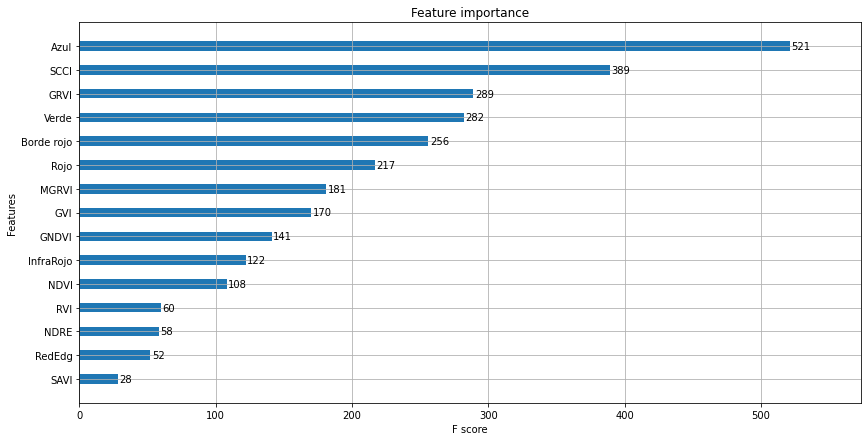

In [ ]:
plot_importance(best_xgb_2, height=0.4, max_num_features=15)

In [ ]:
y_train_pred_xgb2 = best_xgb_2.predict(X_train)
y_test_pred_xgb2 = best_xgb_2.predict(X_test)

Acurracy

In [ ]:
acc_train_xgb2 = accuracy_score(y_train, y_train_pred_xgb2)
acc_test_xgb2 = accuracy_score(y_test, y_test_pred_xgb2)
print("accuracy of train subset for best_xgb2:", acc_train_xgb2)
print("accuracy of test subset for best_xgb2:", acc_test_xgb2)

accuracy of train subset for best_xgb2: 0.3186484174508127
accuracy of test subset for best_xgb2: 0.2771599657827203


Precision Score

In [ ]:
precision_train_xgb2 = precision_score(y_train, y_train_pred_xgb2, average="weighted")
precision_test_xgb2 = precision_score(y_test, y_test_pred_xgb2, average="weighted")

print("Precision Score for train subset for best_xgb2:", precision_train_xgb2)
print("Precision Score for test subset for best_xgb2:", precision_test_xgb2)


Precision Score for train subset for best_xgb2: 0.34290910388038526
Precision Score for test subset for best_xgb2: 0.26669909032964545


Recall Score

In [ ]:

recall_train_xgb2 = recall_score(y_train, y_train_pred_xgb2, average="weighted")
recall_test_xgb2 = recall_score(y_test, y_test_pred_xgb2, average="weighted")

print("Recall Score for train subset for best_xgb2:", recall_train_xgb2)
print("Recall Score for test subset for best_xgb2:", recall_test_xgb2)

Recall Score for train subset for best_xgb2: 0.3186484174508127
Recall Score for test subset for best_xgb2: 0.2771599657827203


F1 Score

In [ ]:
f1_train_xgb2 = recall_score(y_train, y_train_pred_xgb2, average="weighted")
f1_test_xgb2 = recall_score(y_test, y_test_pred_xgb2, average="weighted")

print("F1 Score for train subset for best_xgb2:", f1_train_xgb2)
print("F1 Score for test subset for best_xgb2:", f1_test_xgb2)

F1 Score for train subset for best_xgb2: 0.3186484174508127
F1 Score for test subset for best_xgb2: 0.2771599657827203


In [ ]:
xgb_dron_metricas = metricas(y_test, y_test_pred_xgb2, model= "XGBoost Clasifier Dron Features")
CLF_TestMetrics = CLF_TestMetrics.append(xgb_dron_metricas, ignore_index=True)

# XGboost Clasification con dron features + (Aspecto, Temperatura Minima de Espigazon, Dias entre fechas y Variedad)

In [ ]:
# For Mixed Classification:
X, y = dataset.loc[:, ['Variedad', 'Azul', 'Verde',
       'InfraRojo', 'Borde rojo', 'Rojo', 'NDVI', 'NDRE', 'SAVI', 'SCCI',
       'GNDVI', 'GVI', 'RVI', 'RedEdg', 'LNVI', 'GRVI', 'MGRVI', 'T.min.Espig', 'Aspecto', 'Dias.entre.fechas']], dataset.ZADOCK
y = preproc.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(X_train.shape, X_test.shape)

(28056, 20) (7014, 20)


In [ ]:
#ParamGrid_1
param_grid1= {"max_depth" : [6, 12],
             "learning_rate": [0.1, 0.3],
             "early_stopping_rounds" : [10],
             "reg_lambda" : [0, 1.0] #parámetro de regularización l2
}

xgb_grid= GridSearchCV(estimator=clf_xgb, 
                           param_grid= param_grid1,
                           scoring= "accuracy",
                           verbose= 0,
                           cv= 5)

In [ ]:
#xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, num_class=18,
                                     objective='multi:softmax', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'early_stopping_rounds': [10],
                         'learning_rate': [0.1, 0.3], 'max_depth': [6, 12]

In [ ]:
# = xgb_grid.best_estimator_
#print(best_xgb_dronplus)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=18, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              seed=42, silent=None, subsample=1, verbosity=1)


In [ ]:
best_xgb_dronplus = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, num_class=18, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              seed=42, silent=None, subsample=1, verbosity=1)

In [ ]:
best_xgb_dronplus.fit(X_train, y_train)

In [ ]:
y_train_pred_xgb3 = best_xgb_dronplus.predict(X_train)
y_test_pred_xgb3 = best_xgb_dronplus.predict(X_test)

Acurracy Score

In [ ]:
acc_train_xgb3 = accuracy_score(y_train, y_train_pred_xgb3)
acc_test_xgb3 = accuracy_score(y_test, y_test_pred_xgb3)
print("accuracy of train subset for best_xgb3:", acc_train_xgb3)
print("accuracy of test subset for best_xgb3:", acc_test_xgb3)

accuracy of train subset for best_xgb3: 1.0
accuracy of test subset for best_xgb3: 0.9885942400912461


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score

Precision Score

In [ ]:
precision_train_xgb3 = precision_score(y_train, y_train_pred_xgb3, average="weighted")
precision_test_xgb3 = precision_score(y_test, y_test_pred_xgb3, average="weighted")

print("Precision Score for train subset for best_xgb3:", precision_train_xgb3)
print("Precision Score for test subset for best_xgb3:", precision_test_xgb3)


Precision Score for train subset for best_xgb3: 1.0
Precision Score for test subset for best_xgb3: 0.9886704567261342


Recall Score

In [ ]:
recall_train_xgb3 = recall_score(y_train, y_train_pred_xgb3, average="weighted")
recall_test_xgb3 = recall_score(y_test, y_test_pred_xgb3, average="weighted")

print("Recall Score for train subset for best_xgb3:", recall_train_xgb3)
print("Recall Score for test subset for best_xgb3:", recall_test_xgb3)

Recall Score for train subset for best_xgb3: 1.0
Recall Score for test subset for best_xgb3: 0.9885942400912461


F1 Score

In [ ]:
f1_train_xgb3 = recall_score(y_train, y_train_pred_xgb3, average="weighted")
f1_test_xgb3 = recall_score(y_test, y_test_pred_xgb3, average="weighted")

print("F1 Score for train subset for best_xgb3:", f1_train_xgb3)
print("F1 Score for test subset for best_xgb3:", f1_test_xgb3)

F1 Score for train subset for best_xgb3: 1.0
F1 Score for test subset for best_xgb3: 0.9885942400912461


In [ ]:
xgb_metricas_mixed = metricas(y_test, y_test_pred_xgb3, model= "XGBoost Clasifier Mixed Features")
CLF_TestMetrics = CLF_TestMetrics.append(xgb_metricas_mixed, ignore_index=True)

# Conlusiones

In [ ]:
CLF_TestMetrics= CLF_TestMetrics.set_index("model")

In [ ]:
CLF_TestMetrics.sort_values("accuracy", ascending=False)

,F1,accuracy,precision,recall
model,,,,
XGBoost Clasifier Mixed Features,0.988584,0.988594,0.988670,0.988594
XGBoost Clasifier All Features,0.988425,0.988452,0.988492,0.988452
Random Forest Classifier All Features,0.987319,0.987311,0.987376,0.987311
Decission Tree Classifier All Features,0.971749,0.971628,0.972084,0.971628
SGD Classifier All Features,0.465177,0.466638,0.533816,0.466638
XGBoost Clasifier Dron Features,0.252071,0.277160,0.266699,0.277160
KNN Classifier All Features,0.252870,0.271315,0.256623,0.271315
Random Forest Classifier Dron Features,0.196517,0.253208,0.171876,0.253208
Decission Tree Classifier Dron Features,0.182843,0.227117,0.171987,0.227117


Se muestran en el dataframe los resultados generales de los modelos (óptimos) de clasificación.
Los modelos de XGBoost, Random Forest y Decision Trees muestran muy buena capacidad predictiva utilizando todos los features.

Aprendizaje Supervisado:
Se entrenan dos modelos de clasificación, utilizando el algoritmo Extreme Gradient Boosting, realizando un grid search en ambos casos sobre la misma combinación de parámetros. La diferencia entre ambos modelos está en el conjunto de features utilizados. En el primer caso, se utilizan todos los features que componen el dataset (modelo 1) y en el segundo caso se utilizan únicamente los features derivados de la imágenes por drones, removiendo (entre otros) datos climáticos (modelo 2). 
La variable a predecir es el estado fenológico (representado por la escala de zadock). Esta variable adquiere 18 valores distintos. Se vió gráficamente que ninguna subclase tiene una frecuencia que altere el balance de los datos (y que por lo tanto altere la viabilidad de uso de métricas como el _accuracy_)

Dadas las distintas métricas obtenidas, se observa que la diferencia en la capacidad de predicción de ambos modelos es fuertemente notable. De esto se deduce que existen features fuera de aquellos obtenidos por drones que juegan un rol fundamental en la explicación del estado fenológico.

El mejor modelo que ajusta los dron features es el XGBoost.

En las gráficas de _features importances_ se observa que variables como _Variedad_, _Aspecto_, _Temperatura mínima de espigazón_ son críticas a la hora de optimizar la clasificación. Es tal así que el modelo 1 tiene una predicción perfecta sobre el conjunto de entrenamiento y una predicción casi perfecta sobre el conjunto de test, sin haber (a nuestro criterio) indicativas de que el modelo este "overfiteado".



## Gradient Boosting para Regresión utilizando todos los features.

In [ ]:
#For Regression
X, y = dataset.iloc[:, 2:], dataset.RDTO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(X_train.shape, X_test.shape)


(28056, 46) (7014, 46)


In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_params = {
              "loss" : ["ls", "lad", ],  # "lad"  refers to least absolute deviation.
              "learning_rate" : [0.05, 0.1, 0.3],
              #criterion by default is friedman mse
              # The minimum samples required to split an internal node is 2 by default.
             
              "max_features" : ["auto", "sqrt"]
             }

gb = GradientBoostingRegressor(random_state= 42, n_estimators= 200)

gb_grid = GridSearchCV(estimator= gb,
                       param_grid = gb_params,
                       scoring= "neg_mean_squared_error",
                       cv= 5)

In [ ]:
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=200,
                                                 n_iter_n...nge=None,
                   

In [ ]:
results_gb = pd.DataFrame(gb_grid.cv_results_)
results_gb[["param_learning_rate", "param_loss", "param_max_features", "mean_test_score", "std_test_score", "rank_test_score"]].sort_values("rank_test_score")

,param_learning_rate,param_loss,param_max_features,mean_test_score,std_test_score,rank_test_score
8,0.3,ls,auto,-76090.058295,1497.065601,1
9,0.3,ls,sqrt,-101498.371639,2508.695704,2
4,0.1,ls,auto,-127570.936609,2712.549756,3
5,0.1,ls,sqrt,-170153.560452,5337.237055,4
0,0.05,ls,auto,-184989.133262,8032.154347,5
11,0.3,lad,sqrt,-215343.377566,16425.329895,6
10,0.3,lad,auto,-223931.944033,27741.163429,7
1,0.05,ls,sqrt,-230574.385361,5731.308118,8
7,0.1,lad,sqrt,-287248.331319,9822.092981,9
6,0.1,lad,auto,-307478.258461,15847.866965,10


In [ ]:
gb_best = gb_grid.best_estimator_
y_train_pred_gb = gb_best.predict(X_train)
y_test_pred_gb = gb_best.predict(X_test)

In [ ]:
train_error_gb = mean_squared_error(y_train, y_train_pred_gb)
test_error_gb = mean_squared_error(y_test, y_test_pred_gb)

RMSE_train_error_gb=math.sqrt(train_error_gb)
RMSE_test_error_gb=math.sqrt(test_error_gb)

RMSEr_train_error_gb=(RMSE_train_error_gb/dataset["RDTO"].mean())
RMSEr_test_error_gb=(RMSE_test_error_gb/dataset["RDTO"].mean())


print(f'Train error: {train_error_gb:.2f}')
print(f'Test error: {test_error_gb:.2f}')

print(f'RMSE train:{RMSE_train_error_gb:.2f}')
print(f'RMSE test:{RMSE_test_error_gb:.2f}')

print(f'RMSE relativo test:{RMSEr_test_error_gb:.2f}')
print(f'RMSE relativo train:{RMSEr_train_error_gb:.2f}')

Train error: 69215.54
Test error: 85101.66
RMSE train:263.09
RMSE test:291.72
RMSE relativo test:0.05
RMSE relativo train:0.05
